# Kruskal's

In [1]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []
  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [2]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True

# Heap Construction [MaxHeap]

In [3]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] < self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    largest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != index:
      self._swap(index, largest)
      self._heapify_down(largest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
max_heap = MaxHeap(H, method='heapify')
# max_heap = MaxHeap(H, method='one_by_one')
max_heap.print_heap()

100 90 70 80 50 60 30 10 40 20


# Heap Construction [MinHeap]

In [4]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
min_heap = MinHeap(H, method='heapify')
# min_heap = MinHeap(H, method='one_by_one')
min_heap.print_heap()

10 20 40 30 60 50 80 100 70 90


# MinHeap `delete()`

In [5]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
min_heap = MinHeap(H, method='heapify')
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
min_heap.print_heap()

10
20
30
40 60 50 70 90 100 80


# Heap sort [MinHeap]

In [6]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)

  def insert(self, value):
    # 1. append
    self.heap.append(value)
    # 2. heapify (bottom to top)
    self._heapify_up(len(self.heap)-1)

  def delete(self):
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, index):
    smallest = index
    left = index*2 + 1
    right = index*2 + 2
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != index:
      self._swap(index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def heap_sort(self):
    temp_heap = self.heap.copy()
    output = []
    for i in range(len(self.heap)):
      root = self.delete()
      output.append(root)
    self.heap = temp_heap
    return output

  def print_heap(self):
    # print(self.heap)
    print(' '.join(map(str, self.heap)))


H = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
min_heap = MinHeap(H, method='heapify')

min_heap.print_heap()
min_heap.heap_sort()
min_heap.print_heap()

10 20 40 30 60 50 80 100 70 90


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

10 20 40 30 60 50 80 100 70 90


# BST 2

In [7]:
class BST:
  def __init__(self, values=[]):
    self.make_empty()
    for value in values:
      self.insert(value)

  def is_empty(self):
    return self.value is None

  def is_leaf(self):
    return self.value and self.left.is_empty() and self.right.is_empty()

  def make_empty(self):
    self.value, self.left, self.right = None, None, None

  def inorder_traversal(self):
    if self.is_empty():
      return []
    return self.left.inorder_traversal() + [self.value] + self.right.inorder_traversal()

  def insert(self, value):
    if self.is_empty():
      self.value = value
      self.left = BST()
      self.right = BST()
    elif value < self.value:
      self.left.insert(value)
    elif value > self.value:
      self.right.insert(value)

  def delete(self, value):
    if self.is_empty():
      return
    if value < self.value:
      self.left.delete(value)
    elif value > self.value:
      self.right.delete(value)
    else:  # value == self.value
      if self.is_leaf():
        self.make_empty()
      elif self.left.is_empty():
        self._replace_with_right_subtree()
      elif self.right.is_empty():
        self._replace_with_left_subtree()
      else:
        left_max_value = self.left.get_max_value()
        self.value = left_max_value
        self.left.delete(left_max_value)

  def _replace_with_left_subtree(self):
    self.value, self.left, self.right = (self.left.value,
                                         self.left.left, self.left.right)

  def _replace_with_right_subtree(self):
    self.value, self.left, self.right = (self.right.value,
                                         self.right.left, self.right.right)

  def find(self, value):
    if self.is_empty():
      return False
    if self.value == value:
      return True
    if value < self.value:
      return self.left.find(value)
    return self.right.find(value)

  def get_min_value(self):
    if self.is_empty():
      return None
    if self.left.is_empty():
      return self.value
    return self.left.get_min_value()

  def get_max_value(self):
    if self.is_empty():
      return None
    if self.right.is_empty():
      return self.value
    return self.right.get_max_value()

  def __str__(self):
    return str(self.inorder_traversal())


bst = BST([17, 5, 13, 20, 2, 3, 1, 100])
bst.delete(16)
print(bst)
# print(bst.get_min_value())
# print(bst.get_max_value())
# print(bst.find(13))
# print(bst.find(23))

[1, 2, 3, 5, 13, 17, 20, 100]


In [8]:
(12, 19) > (12, 20)

False

In [9]:
# 10 14 19 26 31 42 27 44 35 33

In [10]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('invalid build method')

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def insert(self, value):
    self.heap.append(value)
    self._heapify_up(len(self.heap)-1)

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] < self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, parent_index):
    left = parent_index*2+1
    right = parent_index*2+2
    largest = parent_index
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != parent_index:
      self._swap(parent_index, largest)
      self._heapify_down(largest)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def __str__(self):
    return ' '.join(map(str, self.heap))


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
max_heap = MaxHeap(H, method='heapify')
print(max_heap)

44 35 42 26 33 19 27 10 14 31


# July 23 🌿

In [11]:
# dijkstra (select vertices):
#   pq: priority=weight, item=current_vertex
#   A (start): next? pq <- (B, C); current_vertex=B on dequeue
#     B (5)
#     C (10)

# prim's (select edges):
#   pq: priority:weight, item=(u, v)
#   A (start):
#     A, B (2)
#     A, D (6)

In [12]:
edges = [(10, 'A', 'B'), (5, 'E', 'F'), (12, 'X', 'Y')]
edges.sort()
print(edges)

[(5, 'E', 'F'), (10, 'A', 'B'), (12, 'X', 'Y')]


In [13]:
class UnionFind:
  def __init__(self, vertices):
    self.parent = {u: u for u in vertices}

  def find(self, node):
    while self.parent[node] != node:
      node = self.parent[node]
    return node

  def union(self, u, v):
    root1 = self.find(u)
    root2 = self.find(v)
    if root1 != root2:
      self.parent[root2] = root1
      return True
    return False


def kruskal(adjacency_list):
  mst = []
  edges = []
  for u in adjacency_list:
    for v, weight in adjacency_list[u]:
      edges.append((weight, u, v))
  edges.sort()

  ufs = UnionFind(adjacency_list)

  for weight, u, v in edges:
    if ufs.union(u, v):
      mst.append((u, v, weight))
  return mst


adjacency_list = {
    0: [(1, 10), (2, 6)],
    1: [(0, 10), (3, 15), (2, 4)],
    2: [(0, 6), (1, 4), (3, 11)],
    3: [(1, 15), (2, 11)]
}

kruskal(adjacency_list) == [(1, 2, 4), (0, 2, 6), (2, 3, 11)]

True

In [14]:
adjacency_list = {
    'A': [('C', 3), ('D', 3), ('B', 2)],
    'B': [('A', 2), ('C', 4), ('E', 3)],
    'C': [('A', 3), ('B', 4), ('F', 6), ('E', 1)],
    'D': [('A', 3), ('F', 7)],
    'E': [('B', 3), ('C', 1), ('F', 8)],
    'F': [('D', 7), ('E', 8), ('G', 9), ('C', 6)],
    'G': [('F', 9)]
}

kruskal(adjacency_list) == [('C', 'E', 1),
                            ('A', 'B', 2),
                            ('A', 'C', 3),
                            ('A', 'D', 3),
                            ('C', 'F', 6),
                            ('F', 'G', 9)]

True

# MaxHeap

In [15]:
# Implementation details are things which users of your
# code will not typically use, see, or even know about.
# e.g., method='one_by_one'

# It's another way of saying, "This is not something you should care about."

In [16]:
class MaxHeap:
  def __init__(self, H, method='one_by_one'):  # method is implementation detail
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('invalid build method')

  def insert(self, value):
    self.heap.append(value)
    last_index = len(self.heap)-1
    self._heapify_up(last_index)

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] < self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, parent_index):
    left = parent_index*2+1
    right = parent_index*2+2
    largest = parent_index
    if left < len(self.heap) and self.heap[left] > self.heap[largest]:
      largest = left
    if right < len(self.heap) and self.heap[right] > self.heap[largest]:
      largest = right
    if largest != parent_index:
      self._swap(parent_index, largest)
      self._heapify_down(largest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def __str__(self):
    return ' '.join(map(str, self.heap))


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
max_heap = MaxHeap(H, method='heapify')
print(max_heap)

44 35 42 26 33 19 27 10 14 31


In [17]:
class MinHeap:
  def __init__(self, H, method='one_by_one'):  # method is implementation detail
    self.heap = []
    if method == 'one_by_one':
      self._build_heap_one_by_one(H)
    elif method == 'heapify':
      self._build_heap_heapify(H)
    else:
      raise Exception('invalid build method')

  def is_empty(self):
    return len(self.heap) == 0

  def insert(self, value):
    self.heap.append(value)
    last_index = len(self.heap)-1
    self._heapify_up(last_index)

  def delete(self):
    self._swap(0, len(self.heap)-1)
    root = self.heap.pop()
    self._heapify_down(0)
    return root

  def _heapify_up(self, index):
    parent_index = (index-1)//2
    if index > 0 and self.heap[parent_index] > self.heap[index]:
      self._swap(index, parent_index)
      self._heapify_up(parent_index)

  def _heapify_down(self, parent_index):
    left = parent_index*2+1
    right = parent_index*2+2
    smallest = parent_index
    if left < len(self.heap) and self.heap[left] < self.heap[smallest]:
      smallest = left
    if right < len(self.heap) and self.heap[right] < self.heap[smallest]:
      smallest = right
    if smallest != parent_index:
      self._swap(parent_index, smallest)
      self._heapify_down(smallest)

  def _build_heap_one_by_one(self, H):
    for value in H:
      self.insert(value)

  def _build_heap_heapify(self, H):
    self.heap = H
    middle_index = len(self.heap)//2-1
    for i in range(middle_index, -1, -1):
      self._heapify_down(i)

  def _swap(self, i, j):
    self.heap[i], self.heap[j] = self.heap[j], self.heap[i]

  def heap_sort(self):
    temp_heap = self.heap.copy()
    output = []
    for _ in range(len(self.heap)):
      root = self.delete()
      output.append(root)
    self.heap = temp_heap
    return output

  def __str__(self):
    return ' '.join(map(str, self.heap))


H = [10, 14, 19, 26, 31, 42, 27, 44, 35, 33]
min_heap = MinHeap(H, method='heapify')
print(min_heap.heap_sort())
print(min_heap.heap)

[10, 14, 19, 26, 27, 31, 33, 35, 42, 44]
[10, 14, 19, 26, 31, 42, 27, 44, 35, 33]


In [18]:
class PriorityQueue:
  def __init__(self):
    self.min_heap = MinHeap(H=[])

  def enqueue(self, value):
    self.min_heap.insert(value)

  def dequeue(self):
    return self.min_heap.delete()

  def is_empty(self):
    return self.min_heap.is_empty()

  def __str__(self):
    return str(self.min_heap)


pq = PriorityQueue()
pq.enqueue((90, 'rahul'))
pq.enqueue((50, 'vidhatri'))
pq.enqueue((100, 'cmd'))
pq.enqueue((40, 'harikesh'))
pq.enqueue((65, 'sanika'))

print(pq.dequeue())
print(pq.dequeue())
print(pq.dequeue())
print(pq.dequeue())

(40, 'harikesh')
(50, 'vidhatri')
(65, 'sanika')
(90, 'rahul')


In [19]:
H = [19, 5, 15, 62, 1, 100]
min_heap = MinHeap(H)
print(min_heap)
print(min_heap.delete())
min_heap.insert(0)
min_heap.insert(-5)
min_heap.insert(-1000)
print(min_heap.delete())

1 5 15 62 19 100
1
-1000


In [20]:
# priority, item
# H = [90, 50, 100, 40, 65] # marks
H = [(90, 'rahul'), (50, 'vidhatri'), (100, 'cmd'), (40, 'harikesh'), (65, 'sanika')]  # marks, name
min_heap = MinHeap(H)
print(min_heap)
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())

(40, 'harikesh') (50, 'vidhatri') (100, 'cmd') (90, 'rahul') (65, 'sanika')
(40, 'harikesh')
(50, 'vidhatri')
(65, 'sanika')
(90, 'rahul')
(100, 'cmd')


In [21]:
H = ['dog', 'house', 'ink', 'ball', 'cat', 'apple', 'eye', 'fish', 'goat']
min_heap = MinHeap(H)
print(min_heap)
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())
print(min_heap.delete())

apple cat ball fish dog ink eye house goat
apple
ball
cat
dog
eye


In [22]:
min_heap = MinHeap(H=[])
min_heap.insert((90, 'rahul'))  # enqueue
min_heap.insert((50, 'vidhatri'))  # enqueue
min_heap.insert((100, 'cmd'))  # enqueue
min_heap.insert((40, 'harikesh'))  # enqueue
min_heap.insert((65, 'sanika'))  # enqueue

print(min_heap.delete())  # dequeue
print(min_heap.delete())  # dequeue
print(min_heap.delete())  # dequeue
print(min_heap.delete())  # dequeue

(40, 'harikesh')
(50, 'vidhatri')
(65, 'sanika')
(90, 'rahul')


In [23]:
queue = []
queue.append(5)
queue.append(50)
queue.append(550)
print(queue.pop(0))
print(queue.pop(0))
print(queue.pop(0))


class Queue:  # wrapper class
  def __init__(self):
    self.data = []

  def enqueue(self, value):
    self.data.append(value)  # wrapped the append procedure inside enqueue

5
50
550


# BST

In [24]:
class BST:
  def __init__(self, initial_values=[]):
    self.make_empty()
    for value in initial_values:
      self.insert(value)

  def make_empty(self):
    self.value, self.left, self.right = None, None, None

  def is_empty(self):
    return self.value is None

  def is_leaf(self):
    return self.value is not None and self.left.is_empty() and self.right.is_empty()

  def insert(self, number):
    if self.value is None:
      self.value = number
      self.left = BST()
      self.right = BST()
    elif number < self.value:
      self.left.insert(number)
    elif number > self.value:
      self.right.insert(number)

  def delete(self, number):
    if self.is_empty():
      return
    if number < self.value:
      self.left.delete(number)
    elif number > self.value:
      self.right.delete(number)
    else:  # number == self.value (kill myself 👇)
      if self.is_leaf():  # 0 child
        self.make_empty()
      elif self.left.is_empty():  # 1 child (R)
        self._replace_with_right_subtree()
      elif self.right.is_empty():  # 1 child (L)
        self._replace_with_left_subtree()
      else:  # 2 child
        left_max_value = self.left.get_max_value()
        self.value = left_max_value
        self.left.delete(left_max_value)

  def _replace_with_right_subtree(self):
    self.value, self.left, self.right = (self.right.value,
                                         self.right.left, self.right.right)

  def _replace_with_left_subtree(self):
    self.value, self.left, self.right = (self.left.value,
                                         self.left.left, self.left.right)

  def inorder_traversal(self):
    if self.is_empty():
      return []
    return self.left.inorder_traversal() + [self.value] + self.right.inorder_traversal()

  def get_min_value(self):
    if self.is_empty():
      return None
    if self.left.is_empty():
      return self.value
    return self.left.get_min_value()

  def get_max_value(self):
    if self.is_empty():
      return None
    if self.right.is_empty():
      return self.value
    return self.right.get_max_value()

  def find(self, number):
    if self.is_empty():
      return False
    if number == self.value:
      return True
    if number < self.value:
      return self.left.find(number)
    if number > self.value:
      return self.right.find(number)


root = BST([17, 5, 2, 13, 20, 3, 19])
root.delete(20)
root.inorder_traversal()

[2, 3, 5, 13, 17, 19]

In [25]:
# (None, None, None) empty BST
# (16, BST, BST) non-empty BST

In [26]:
# 16 15 40 4 18 7 92 100 5
# 16, 15, 40, 4, 18, 7, 92, 100, 5
# BST (empty): value=None, L, R = None
# BST (non-empty): value=Number, L, R = BST

# A BST Node whose value=None is invisible (L, R = None)

# July 26

# Dijkstra's Algorithm

In [1]:
from heapq import heappush, heappop


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def enqueue(self, priority, item):
    heappush(self.heap, (priority, item))

  def dequeue(self):
    return heappop(self.heap)[1]

  def is_empty(self):
    return len(self.heap) == 0


def dijkstra(adjacency_list, start_vertex):
  visited = {u: False for u in adjacency_list}
  distance = {u: float('inf') for u in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)

  return distance


adjacency_list = {
    0: [(1, 10), (2, 80)],
    1: [(2, 6), (4, 20)],
    2: [(3, 70)],
    4: [(5, 50), (6, 5)],
    3: [],
    5: [(6, 10)],
    6: []
}

dijkstra(adjacency_list, 0) == {0: 0, 1: 10.0, 2: 16.0, 3: 86.0, 4: 30.0, 5: 80.0, 6: 35.0}

adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

dijkstra(adjacency_list, 'A') == {'A': 0, 'B': 3, 'C': 2, 'D': 5, 'E': 6}

True

True

In [5]:
from heapq import heappush, heappop


class PriorityQueue:
  def __init__(self):
    self.heap = []

  def enqueue(self, priority, item):
    heappush(self.heap, (priority, item))

  def dequeue(self):
    return heappop(self.heap)[1]

  def is_empty(self):
    return len(self.heap) == 0


def dijkstra(adjacency_list, start_vertex):
  visited = {u: False for u in adjacency_list}
  distance = {u: float('inf') for u in adjacency_list}
  predecessor = {u: None for u in adjacency_list}
  distance[start_vertex] = 0

  pq = PriorityQueue()
  pq.enqueue(0, start_vertex)

  while not pq.is_empty():
    current_vertex = pq.dequeue()
    visited[current_vertex] = True
    for neighbor, weight in adjacency_list[current_vertex]:
      if not visited[neighbor]:
        new_distance = distance[current_vertex] + weight
        if new_distance < distance[neighbor]:
          distance[neighbor] = new_distance
          pq.enqueue(new_distance, neighbor)
          predecessor[neighbor] = current_vertex

  return distance, predecessor


adjacency_list = {
    'A': [('B', 4), ('C', 2)],
    'B': [('C', 3), ('D', 2), ('E', 3)],
    'C': [('B', 1), ('D', 4), ('E', 5)],
    'D': [],
    'E': [('D', 1)],
}

distance, predecessor = dijkstra(adjacency_list, 'A')


def construct_path(predecessor, destination):
  path = []
  while destination is not None:
    path.append(destination)
    destination = predecessor[destination]
  path.reverse()
  return path


for u in adjacency_list:
  path = construct_path(predecessor, u)
  print(f'{u=}, {distance[u]=}, {path=}')

u='A', distance[u]=0, path=['A']
u='B', distance[u]=3, path=['A', 'C', 'B']
u='C', distance[u]=2, path=['A', 'C']
u='D', distance[u]=5, path=['A', 'C', 'B', 'D']
u='E', distance[u]=6, path=['A', 'C', 'B', 'E']


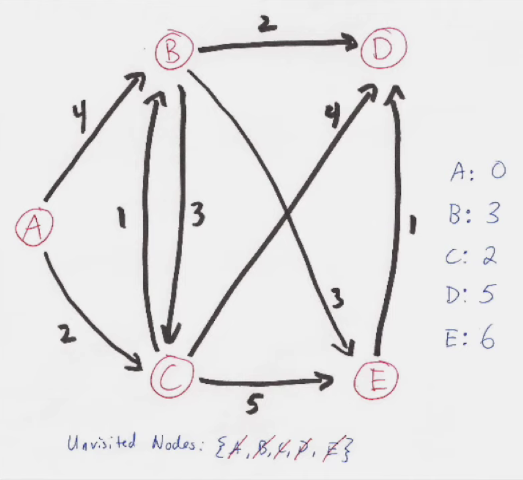